# Import Relevent Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline

import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects


# Import The DataSet

In [2]:
df = pd.read_csv('./US_Accidents_Dec21_updated.csv')

In [3]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 2,845,342 & Columns: 47


In [4]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

# DataSet Cleaning

In [6]:
missing_values = ["N/a","na",np.nan]
df = pd.read_csv('./US_Accidents_Dec21_updated.csv', na_values = missing_values)

In [7]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [8]:
df.isnull().any()

ID                       False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                  False
End_Lng                  False
Distance(mi)             False
Description              False
Number                    True
Street                    True
Side                     False
City                      True
County                   False
State                    False
Zipcode                   True
Country                  False
Timezone                  True
Airport_Code              True
Weather_Timestamp         True
Temperature(F)            True
Wind_Chill(F)             True
Humidity(%)               True
Pressure(in)              True
Visibility(mi)            True
Wind_Direction            True
Wind_Speed(mph)           True
Precipitation(in)         True
Weather_Condition         True
Amenity                  False
Bump                     False
Crossing

In [9]:
df.dropna(how="all")

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
clean_dataset = df.interpolate(how="all")

In [11]:
clean_dataset.dropna(inplace=True)

In [12]:
clean_dataset.isnull().any()

ID                       False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                  False
End_Lng                  False
Distance(mi)             False
Description              False
Number                   False
Street                   False
Side                     False
City                     False
County                   False
State                    False
Zipcode                  False
Country                  False
Timezone                 False
Airport_Code             False
Weather_Timestamp        False
Temperature(F)           False
Wind_Chill(F)            False
Humidity(%)              False
Pressure(in)             False
Visibility(mi)           False
Wind_Direction           False
Wind_Speed(mph)          False
Precipitation(in)        False
Weather_Condition        False
Amenity                  False
Bump                     False
Crossing

# K Means Clustering

## View Columns Index

In [13]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754950 entries, 14 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)    

## Global Arrays

In [38]:
colors = ['red','blue','green','brown','gray','limegreen','yellow','violet','slategrey','bisque','burlywood','limegreen','olive','lightsteelblue']
groups = ['Cluster A','Cluster B','Cluster C','Cluster D','Cluster E','Cluster F','Cluster G']


### Bar Chart Function

In [39]:
def generate_intervals_labels(attribute, split, gap):
    var_min = min(df[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):
        
        lower_limit = int(var_min+((i-1)*gap))
        
        if i==split:
            upper_limit = int(max(clean_dataset[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))
            
        #intervals
        intervals.append(upper_limit)
        
        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)    
    
    return intervals, labels

In [40]:
def barChart(dataframe, attribute, clrs, intervals, labels, fig_size, font_size, y_lim, adjust, title):
    
    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')
    
    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1
                                                                                               
    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)
    
    cmap = cm.get_cmap(clrs, len(intervals))   
    clrs = colors
    
    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs);
    
    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')
        
    plt.title(title, size=20, color='black')
    plt.ylim(y_lim)
    
    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)
        
    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='black')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='black')
    
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    MA = mpatches.Patch(color=clrs[max_index], label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
              labelcolor=[clrs[max_index]], edgecolor='white');

## Elbow Plot Function

In [41]:
def elbowPlot(x,y,array,clusters):
    data = clean_dataset.iloc[:,[x,y]].values
    wcss = []

    for i in range(1,clusters):
        global kmeans;
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        kmeans.fit(array)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1,clusters),wcss)
    plt.title('The Elbow Value')
    plt.xlabel('No of Clusters')
    plt.ylabel('wcss value')
    plt.show()
    type(kmeans)

## Drow Cluster Plot Function

In [42]:
def drowClusterPlot(array,numberOfClusters,title,xlabel,ylabel):
    kmeansModel = KMeans(n_clusters = numberOfClusters, init = 'k-means++', random_state = 0)

    y_kmeans = kmeansModel.fit_predict(array)

    for i in range(0,numberOfClusters):
        plt.scatter(array[y_kmeans == i,0], array[y_kmeans == i,1], s = 0.1, c = colors[i], label = groups[i])
        
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 10, c = 'black' , label = 'Centroids')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Key Question 1

## How has the change in road clarity affected road accidents?

### 1.1 Visibility & Humidity

### Bar Chart Analysis - Visibility

In [43]:
Visibility_intervals, Visibility_labels = generate_intervals_labels('Visibility(mi)', 12, 1)

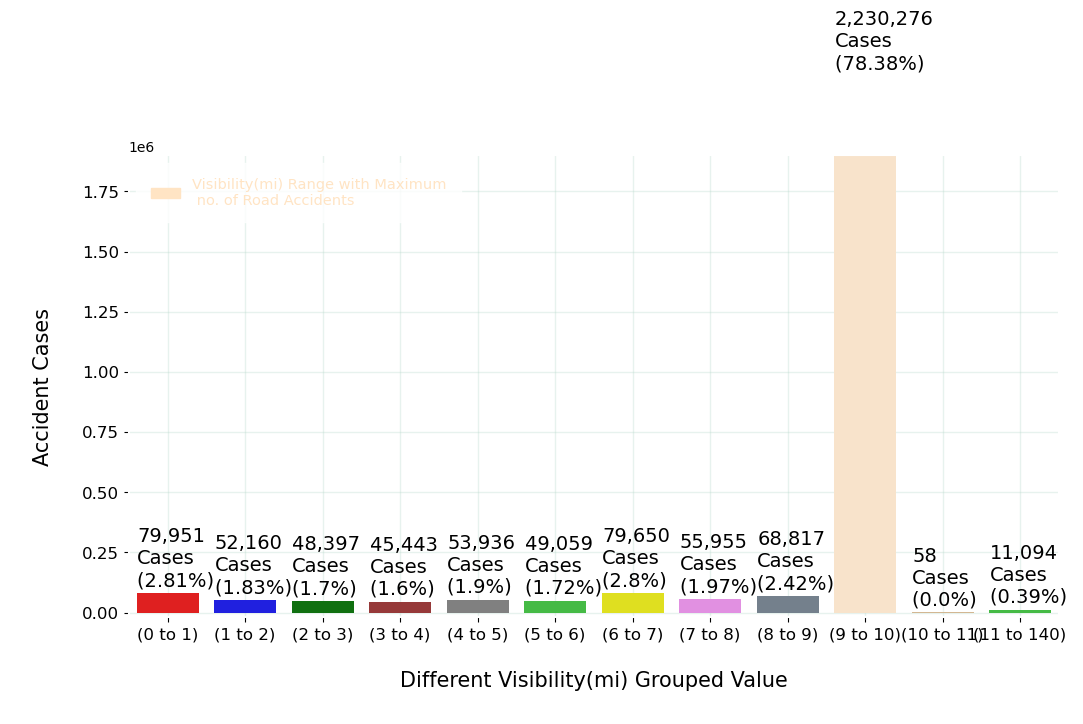

In [48]:
barChart(df, 'Visibility(mi)', 'prism', Visibility_intervals, Visibility_labels, 
                 (12, 6), 14, (-20000, 1900000), [0.01, 30000], '')

### Bar Chart Analysis - Humidity

In [46]:
Humidity_intervals, Humidity_labels = generate_intervals_labels('Humidity(%)', 10, 10)

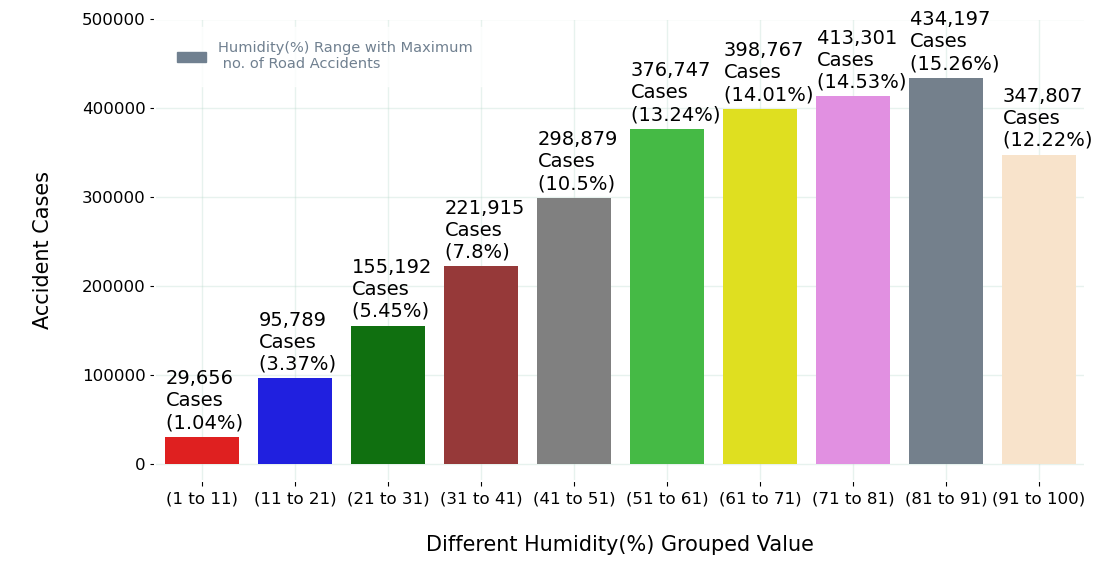

In [52]:
barChart(df, 'Humidity(%)', 'magma', Humidity_intervals, Humidity_labels, 
                 (12, 6), 14, (-20000, 500000), [0.01, 10000], '')

### K-Means Clustering Analysis - Visibility & Humidity

In [20]:
visibilityHumidity = clean_dataset.iloc[:,[25,23]].values
visibilityHumidity

array([[ 10.,  92.],
       [ 10.,  92.],
       [  6., 100.],
       ...,
       [ 10.,  64.],
       [ 10.,  81.],
       [  7.,  47.]])

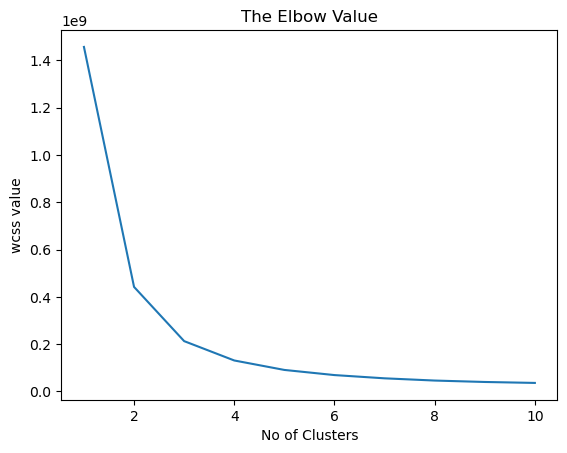

In [21]:
elbowPlot(x = 25, y = 23, array = visibilityHumidity, clusters = 11)

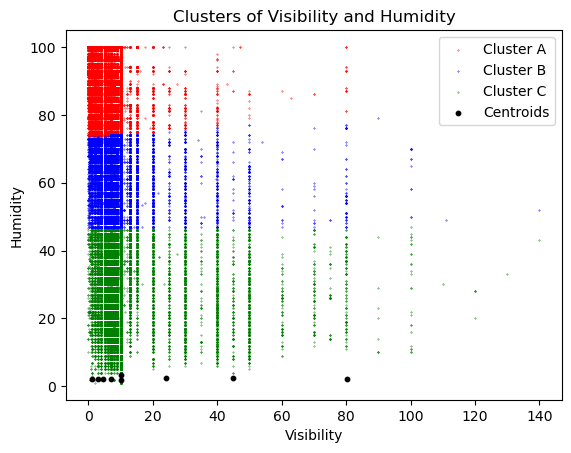

In [39]:
drowClusterPlot(array = visibilityHumidity, numberOfClusters = 3, title = 'Clusters of Visibility and Humidity', xlabel = 'Visibility', ylabel = 'Humidity')

### 1.2 Visibility & Wind

In [23]:
visibilityWind = clean_dataset.iloc[:,[25,27]].values
visibilityWind

array([[10.  ,  6.26],
       [10.  ,  6.72],
       [ 6.  ,  7.18],
       ...,
       [10.  , 10.  ],
       [10.  ,  8.  ],
       [ 7.  ,  7.  ]])

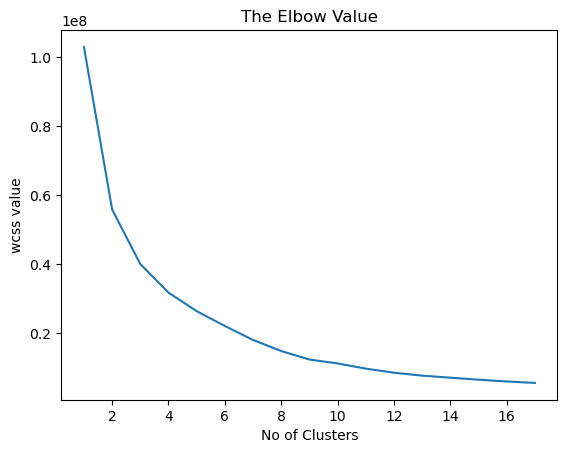

In [29]:
elbowPlot(x = 25, y = 27, array = visibilityWind, clusters = 18)

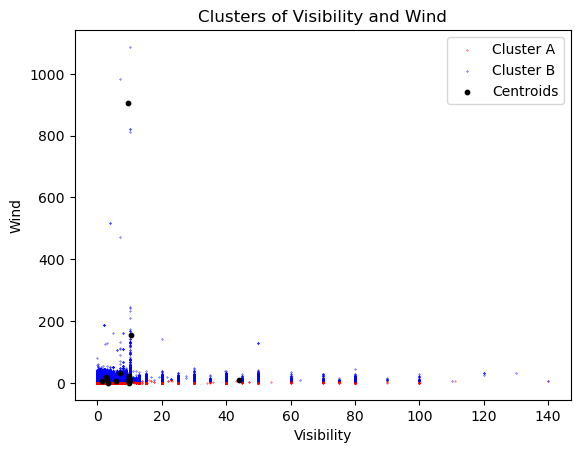

In [30]:
drowClusterPlot(array = visibilityWind, numberOfClusters = 2, title = 'Clusters of Visibility and Wind', xlabel = 'Visibility', ylabel = 'Wind')

### 1.3 Visibility and Serverity

In [32]:
visibilityServerity = clean_dataset.iloc[:,[25,1]].values
visibilityServerity

array([[10.,  3.],
       [10.,  3.],
       [ 6.,  3.],
       ...,
       [10.,  2.],
       [10.,  2.],
       [ 7.,  2.]])

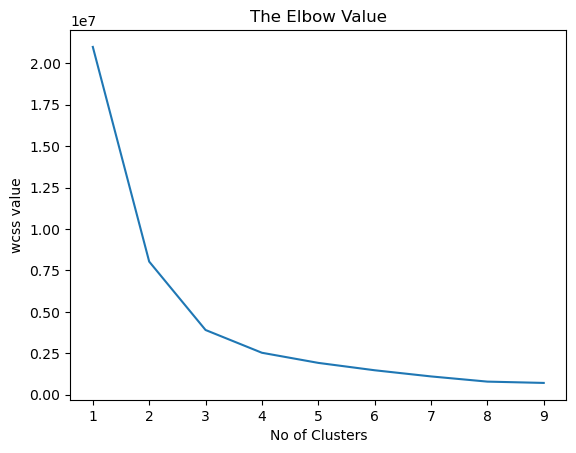

In [34]:
elbowPlot(x = 25, y = 1, array = visibilityServerity, clusters = 10)

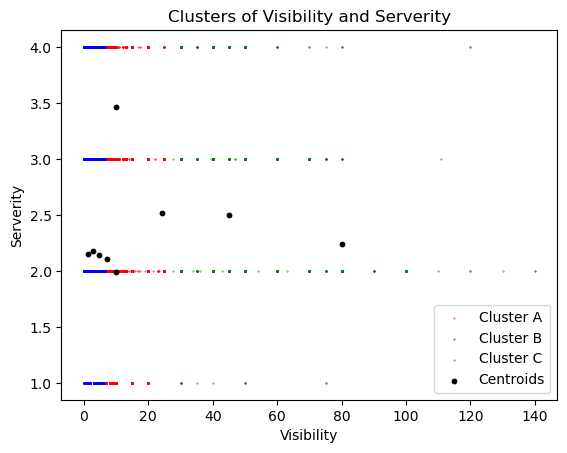

In [38]:
drowClusterPlot(array = visibilityServerity, numberOfClusters = 3, title = 'Clusters of Visibility and Serverity', xlabel = 'Visibility', ylabel = 'Serverity')

## Key Question 2

### 2.1 Pressure & Serverity

### Bar Chart Analysis - Pressure

In [50]:
Pressure_intervals, Pressure_labels = generate_intervals_labels('Pressure(in)', 6, 10)

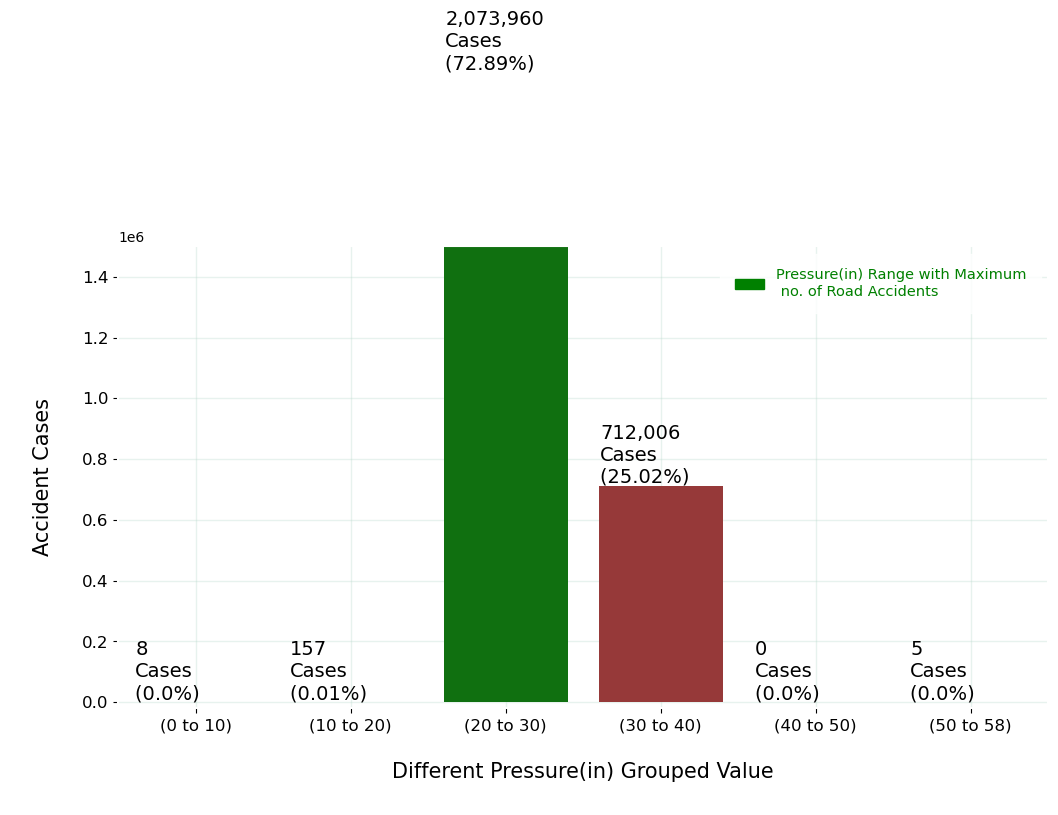

In [53]:
barChart(df, 'Pressure(in)', 'Paired', Pressure_intervals, Pressure_labels, 
                 (12, 6), 14, (-20000, 1500000), [0.01, 10000], '')

### K-Means Clustering Analysis - Pressure & Serverity

In [41]:
pressureServerity = clean_dataset.iloc[:,[24,1]].values
pressureServerity

array([[29.62,  3.  ],
       [29.62,  3.  ],
       [29.65,  3.  ],
       ...,
       [29.74,  2.  ],
       [29.62,  2.  ],
       [28.63,  2.  ]])

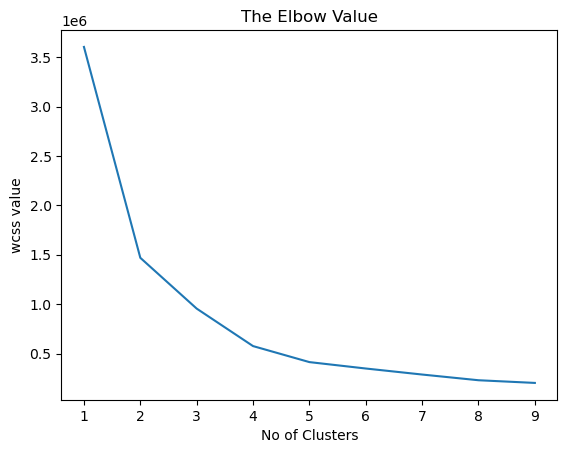

In [42]:
elbowPlot(x = 24, y = 1, array = pressureServerity, clusters = 10)

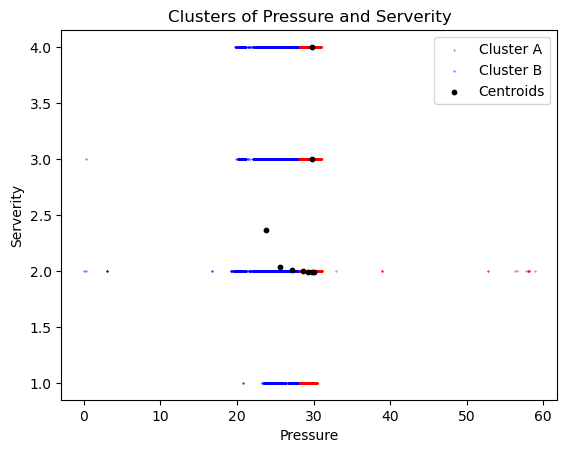

In [44]:
drowClusterPlot(array = pressureServerity, numberOfClusters = 2, title = 'Clusters of Pressure and Serverity', xlabel = 'Pressure', ylabel = 'Serverity')

# Key Question 3

## How has Precipitation affected road accidents?

### 3.1 Precipitation & Pressure

### K-Means Clustering Analysis - Precipitation & Pressure

In [46]:
precipitationPressure = clean_dataset.iloc[:,[28,24]].values
pressureServerity

array([[29.62,  3.  ],
       [29.62,  3.  ],
       [29.65,  3.  ],
       ...,
       [29.74,  2.  ],
       [29.62,  2.  ],
       [28.63,  2.  ]])

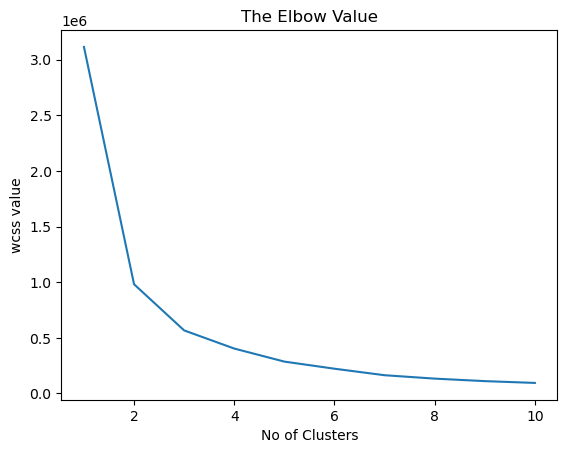

In [47]:
elbowPlot(x = 28, y = 24, array = precipitationPressure, clusters = 11)

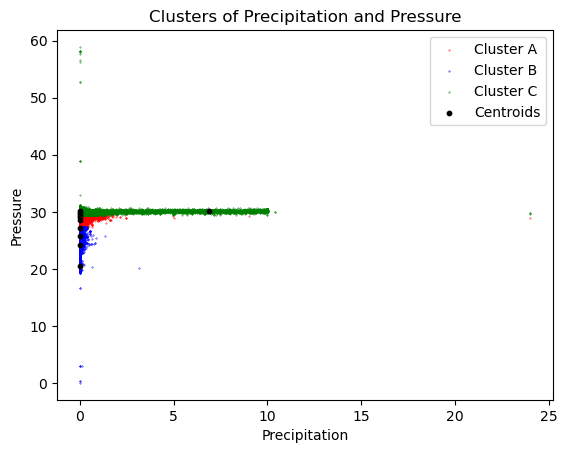

In [48]:
drowClusterPlot(array = precipitationPressure, numberOfClusters = 3, title = 'Clusters of Precipitation and Pressure', xlabel = 'Precipitation', ylabel = 'Pressure')

### 3.2 Precipitation & Wind Speed

In [51]:
precipitationWindSpeed = clean_dataset.iloc[:,[28,27]].values
precipitationWindSpeed

array([[ 0.03,  6.26],
       [ 0.05,  6.72],
       [ 0.07,  7.18],
       ...,
       [ 0.  , 10.  ],
       [ 0.  ,  8.  ],
       [ 0.  ,  7.  ]])

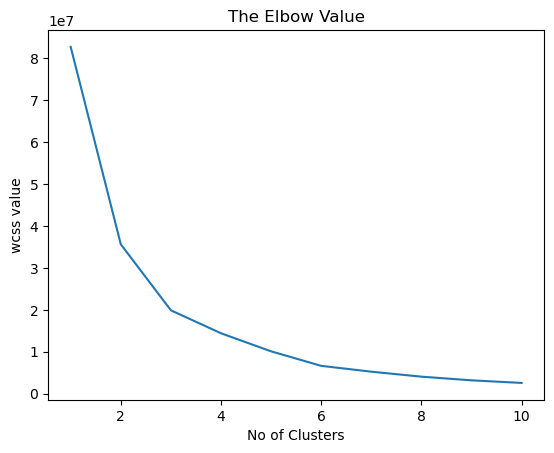

In [52]:
elbowPlot(x = 28, y = 27, array = precipitationWindSpeed, clusters = 11)

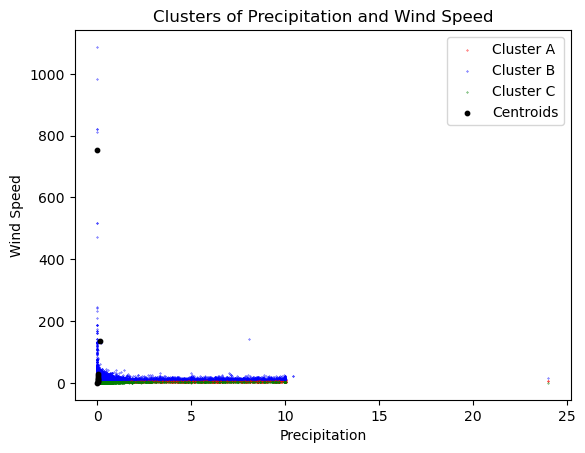

In [53]:
drowClusterPlot(array = precipitationWindSpeed, numberOfClusters = 3, title = 'Clusters of Precipitation and Wind Speed', xlabel = 'Precipitation', ylabel = 'Wind Speed')

### 3.3 Precipitation & Humidity

In [54]:
precipitationHumidity = clean_dataset.iloc[:,[28,23]].values
precipitationHumidity

array([[3.0e-02, 9.2e+01],
       [5.0e-02, 9.2e+01],
       [7.0e-02, 1.0e+02],
       ...,
       [0.0e+00, 6.4e+01],
       [0.0e+00, 8.1e+01],
       [0.0e+00, 4.7e+01]])

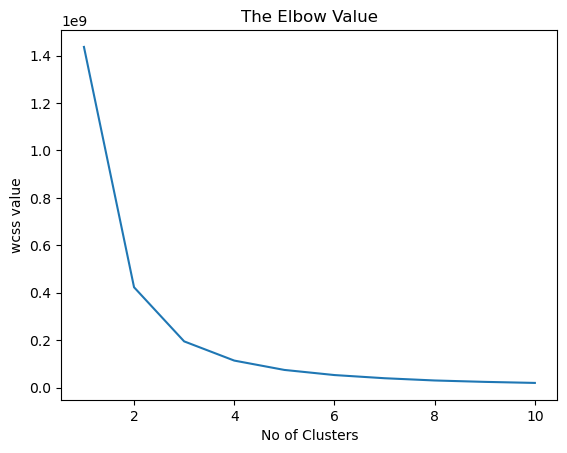

In [55]:
elbowPlot(x = 28, y = 23, array = precipitationHumidity, clusters = 11)

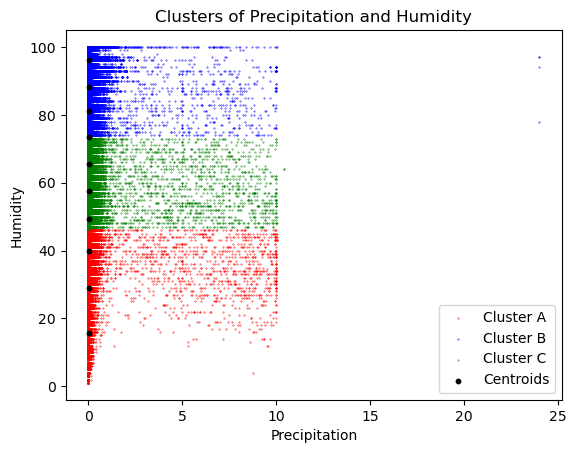

In [56]:
drowClusterPlot(array = precipitationHumidity, numberOfClusters = 3, title = 'Clusters of Precipitation and Humidity', xlabel = 'Precipitation', ylabel = 'Humidity')

# Key Question 4

## How did the average distance between vehicles before the crash affect the crash?

### Distance & Pressure

In [57]:
distancePressure = clean_dataset.iloc[:,[8,24]].values
distancePressure

array([[4.000e-03, 2.962e+01],
       [4.000e-03, 2.962e+01],
       [1.028e+00, 2.965e+01],
       ...,
       [5.610e-01, 2.974e+01],
       [7.720e-01, 2.962e+01],
       [5.370e-01, 2.863e+01]])

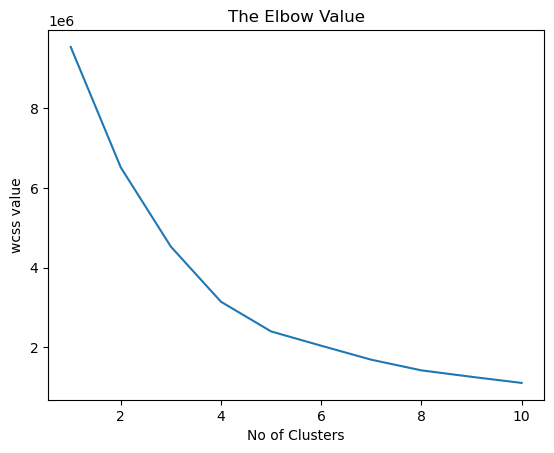

In [58]:
elbowPlot(x = 8, y = 24, array = distancePressure, clusters = 11)

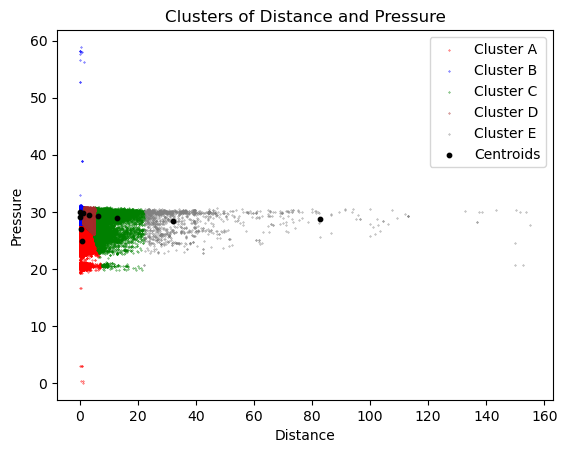

In [59]:
drowClusterPlot(array = distancePressure, numberOfClusters = 5, title = 'Clusters of Distance and Pressure', xlabel = 'Distance', ylabel = 'Pressure')

### Distance & Humidity

In [60]:
distanceHumidity = clean_dataset.iloc[:,[8,23]].values
distanceHumidity

array([[4.000e-03, 9.200e+01],
       [4.000e-03, 9.200e+01],
       [1.028e+00, 1.000e+02],
       ...,
       [5.610e-01, 6.400e+01],
       [7.720e-01, 8.100e+01],
       [5.370e-01, 4.700e+01]])

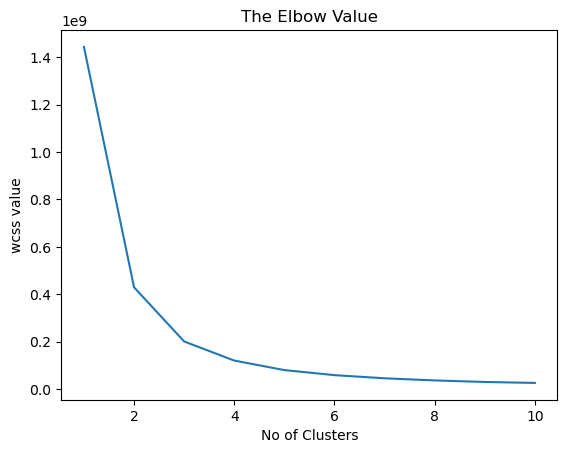

In [61]:
elbowPlot(x = 8, y = 23, array = distanceHumidity, clusters = 11)

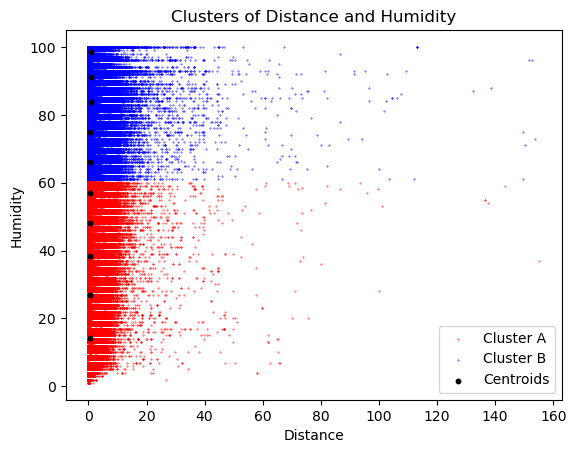

In [62]:
drowClusterPlot(array = distanceHumidity, numberOfClusters = 2, title = 'Clusters of Distance and Humidity', xlabel = 'Distance', ylabel = 'Humidity')